# DEEP LEARNING TECHNIQUES


---

### Karthikeyan K

2018103549

N - Batch


---

**Image Classification using CNN**

**DataSet** : MNIST Handwriting recognition


---



## Theory of ANN

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of artificial neural network, most commonly applied to analyze visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation equivariant responses known as feature maps. Counter-intuitively, most convolutional neural networks are only equivariant, as opposed to invariant, to translation.They have applications in image and video recognition, recommender systems, image classification, image segmentation, medical image analysis, natural language processing, brain-computer interfaces, and financial time series.

CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "full connectivity" of these networks make them prone to overfitting data. Typical ways of regularization, or preventing overfitting, include: penalizing parameters during training (such as weight decay) or trimming connectivity (skipped connections, dropout, etc.) CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble patterns of increasing complexity using smaller and simpler patterns embossed in their filters. Therefore, on a scale of connectivity and complexity, CNNs are on the lower extreme.


In [61]:
# Import All the necessary components
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std,argmax
from tensorflow.keras.optimizers import SGD

### Train and Test Data Split

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

Train Dataset: Used to fit the machine learning model.
Test Dataset: Used to evaluate the fit machine learning model.


In [1]:
def getSplitDataSet():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
 
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
 
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
 
	return trainX, trainY, testX, testY

### Normalizing the Images

In [2]:
def normalizeImages(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')

	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0

	return train_norm, test_norm

In [3]:
def getCNNModel():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
	return model

### Training the Model

### Epoch

In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs. In other words, if we feed a neural network the training data for more than one epoch in different patterns, we hope for a better generalization when given a new "unseen" input (test data). An epoch is often mixed up with an iteration

In [ ]:
def classify():
  trainX, trainY, testX, testY = getSplitDataSet()
  trainX, testX = normalizeImages(trainX, testX)

  model = getCNNModel()
  model.fit(trainX, trainY, epochs=10, batch_size=32)

  model.save("model.h5")
  model=load_model("model.h5")
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('Classification Accuracy is %.3f' % (acc * 100.0))

  return model

classify()

Epoch 1/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1242 - accuracy: 0.9610
Epoch 2/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0441 - accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0296 - accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0212 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0153 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0119 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0082 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0060 - accuracy: 0.9982
Epoch 9/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0046 - accuracy: 0.9986
Epoch 10/10
1875/1875 [==============================] - 81s 43m

### Evaluating the Model

In [ ]:
def evaluateModel(n_folds=5):
  scores, histories = list(), list()
  # prepare cross validation
  dataX, dataY, testX, testY = getSplitDataSet()
  dataX, testX = normalizeImages(dataX, testX)

  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    # define model
    model = getCNNModel()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY),verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('Accuracy : %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)
  return scores, histories

def getGraph(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(3, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(3, 1, 3)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

def getPerformance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

In [ ]:
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

def getImage(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

def getResult():
	img = load_image('test_image.webp')
	model = load_model('model.h5')
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print(digit)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
Sample Images from the dataset


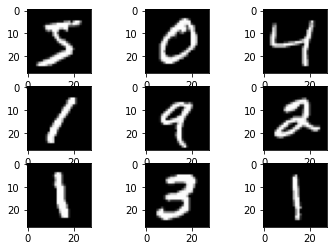

In [ ]:
(trainX, trainY), (testX, testY) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
print("Sample Images from the dataset")

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

### Accuracy of the Model

In [ ]:
scores,histories=evaluateModel()

Accuracy : 99.075
Accuracy : 98.883
Accuracy : 98.917
Accuracy : 99.242
Accuracy : 98.967


### Cross Entropy

Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions. It is closely related to but is different from KL divergence that calculates the relative entropy between two probability distributions, whereas cross-entropy can be thought to calculate the total entropy between the distributions.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


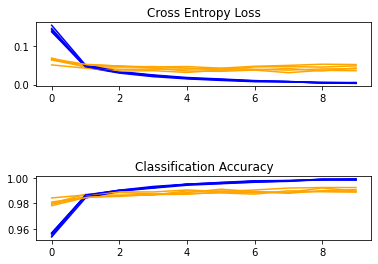

Accuracy: mean=99.017 std=0.130, n=5


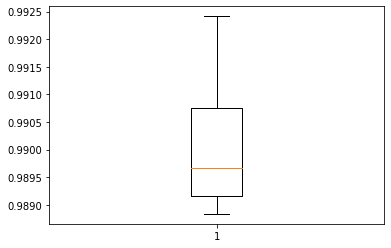

In [ ]:
getGraph(histories)
getPerformance(scores)

### Prediction

After Training and Evaluating the Model, it is used to predict the the unknown data

Predicted Result
7
Test Image


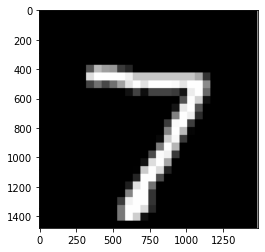

In [59]:
import matplotlib.image as img
plt.imshow(img.imread("test_image.webp"))
print("Predicted Result")
getResult()
print("Test Image")

### Confusion Matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).



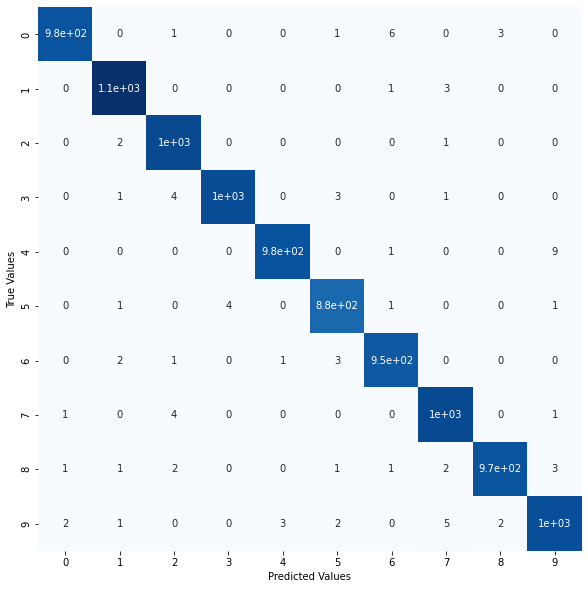

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10))

trainX,trainY,testX,testY=getSplitDataSet()

y_pred = load_model("model.h5").predict(testX)

Y_pred = argmax(y_pred, 1)

Y_test = argmax(testY, 1)

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix



# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)




plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();